# Linear Regression

Linear regression model is one of the simplest regression models. It assumes linear relationship between $x$ and $y$. The output equation is defined as follows:

$$\hat{y} = Wx + b$$

The *Advertising data set* (from "*An Introduction to Statistical Learning*", textbook by Gareth James, Robert Tibshirani, and Trevor Hastie) consists of the sales of a product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: TV, radio, and newspaper. 

Objective: to determine if there is an association between advertising and sales, then we can instruct our client to adjust advertising budgets, thereby indirectly increasing sales. 

We want to train an **inference model**, a series of mathematical expressions we want to apply to our data that depends on a series of parameters. The values of parameters change through training in order for the model to learn and adjust its output.

The training loop is:
+ Initialize the model parameters to some values.
+ Read the training data (for each example), possibly using randomization strategies in order to assure that training is stochastic.
+ Execute the inference model on the training data, getting for each training example the model output with the parameter values. 
+ Compute the loss.
+ Adjuts the model parameters.

We will repeat this process a number of times, according to the learning rate.

After the training we will apply an evaluation phase. 


In [4]:
l = ['aaa','bbb']
d = {'aaa':1, 'bbb':2,'ccc':3}
for name in { your_key: d[your_key] for your_key in l }:
    print(name, d[name])

aaa 1
bbb 2


In [5]:
import tensorflow as tf
print(tf.__version__)

1.14.0


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Load data.

import numpy as np
data = pd.read_csv('data/Advertising.csv', index_col=0)

train_X = data[['TV']].values

train_Y = data.Sales.values
train_Y = train_Y[:, np.newaxis]
n_samples = train_X.shape[0]
print(n_samples)
print(train_X.shape, train_Y.shape)

200
(200, 1) (200, 1)


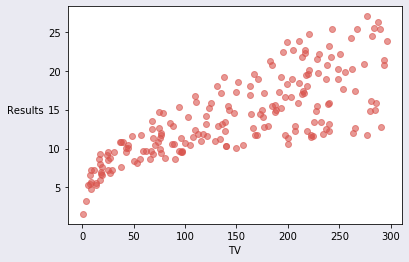

In [7]:
# data visualization
import seaborn as sns
fig, ax = plt.subplots(1, 1)
ax.set_ylabel(
    'Results',
    rotation=0,
    ha='right',  # horizontalalignment
    ma='left',  # multiline alignment
)
ax.set_xlabel('TV')
fig.set_facecolor('#EAEAF2')
ax.plot(train_X,
        train_Y,
        'o',
        color=sns.xkcd_rgb['pale red'],
        alpha=0.6,
        label='Original data')
plt.show()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Optimization Finished!
cost= 7.0680566 W= 0.06842708 b= 3.310594


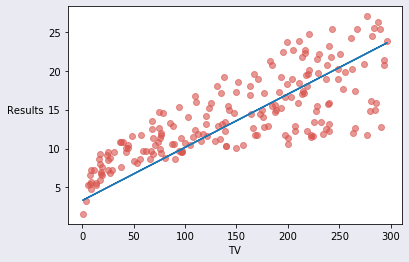

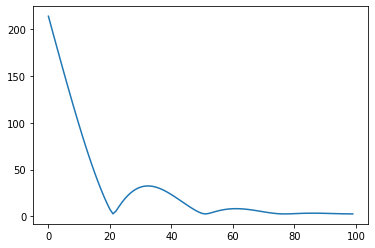

7.0680566


In [8]:
import tensorflow as tf

#  Training Parameters
learning_rate = 0.1
training_epochs = 100

# Define tf Graph Inputs
X = tf.placeholder("float", [None, 1])
y = tf.placeholder("float", [None, 1])

# Create Model variables
# Set model weights
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# Construct a linear model
y_pred = tf.add(tf.multiply(X, W), b)

# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(y_pred - y, 2)) / (2 * n_samples)  #L2 loss

# Define the optimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# Launch the graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    cost_plot = []
    # Fit all training data
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X: train_X, y: train_Y})
        cost_plot.append(sess.run(cost, feed_dict={X: train_X, y: train_Y}))

    print("")
    print("Optimization Finished!")
    print("cost=", sess.run(cost, feed_dict={
        X: train_X,
        y: train_Y
    }), "W=", sess.run(W), "b=", sess.run(b))

    fig, ax = plt.subplots(1, 1)
    ax.set_ylabel(
        'Results',
        rotation=0,
        ha='right',  # horizontalalignment
        ma='left',  # multiline alignment
    )
    ax.set_xlabel('TV')
    fig.set_facecolor('#EAEAF2')
    ax.plot(train_X,
            train_Y,
            'o',
            color=sns.xkcd_rgb['pale red'],
            alpha=0.6,
            label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.show()

    x = range(len(cost_plot))
    plt.plot(x, np.sqrt(cost_plot))
    plt.show()
    print(cost_plot[-1])

## Exercise

Tune the learning parameters of the previous example in order to get a better result.

In [9]:
# your code here

# Multiple Linear Regression

Let's use three features as input vector : TV, Radio, Newspaper

In [10]:
import tensorflow as tf

# Parameters
learning_rate = 1e-2
training_epochs = 2000
display_step = 200

import numpy as np
data = pd.read_csv('data/Advertising.csv', index_col=0)
train_X = data[['TV', 'Radio', 'Newspaper']].values
train_Y = data.Sales.values
train_Y = train_Y[:, np.newaxis]
n_samples = train_X.shape[0]
print(n_samples)
print(train_X.shape, train_Y.shape)

200
(200, 3) (200, 1)


In [11]:
# Define tf Graph Inputs
X = tf.placeholder("float", [None, 3])
y = tf.placeholder("float", [None, 1])

# Create Model variables
# Set model weights
W = tf.Variable(tf.zeros([3, 1]), name="bias")
b = tf.Variable(np.random.randn(), name="bias")

# Construct a multidimensional linear model
y_pred = tf.matmul(X, W) + b

# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(y_pred - y, 2)) / (2 * n_samples)  #L2 loss

# Define the optimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# Launch the graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # Fit all training data
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X: train_X, y: train_Y})

        #Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch: ", '%04d' % (epoch+1), "\n cost= ", sess.run(cost, feed_dict={X: train_X, y: train_Y}), \
          "\n W= ", sess.run(W), "\n b= ", sess.run(b), "\n")

    print("Optimization Finished!")
    print("cost= \n", sess.run(cost, feed_dict={X: train_X, y: train_Y}), \
          "\n W= \n", sess.run(W), "\n b= \n", sess.run(b))

InternalError: Blas GEMV launch failed:  m=3, n=200
	 [[node MatMul (defined at <ipython-input-11-846e1a8cf046>:11) ]]

Errors may have originated from an input operation.
Input Source operations connected to node MatMul:
 Placeholder_2 (defined at <ipython-input-11-846e1a8cf046>:2)	
 bias_1/read (defined at <ipython-input-11-846e1a8cf046>:7)

Original stack trace for 'MatMul':
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\ipykernel\kernelapp.py", line 563, in start
    self.io_loop.start()
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\asyncio\base_events.py", line 534, in run_forever
    self._run_once()
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\asyncio\base_events.py", line 1771, in _run_once
    handle._run()
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\ipykernel\kernelbase.py", line 378, in dispatch_queue
    yield self.process_one()
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tornado\gen.py", line 225, in wrapper
    runner = Runner(result, future, yielded)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tornado\gen.py", line 714, in __init__
    self.run()
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\ipykernel\kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\ipykernel\kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\IPython\core\interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\IPython\core\interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\IPython\core\interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-846e1a8cf046>", line 11, in <module>
    y_pred = tf.matmul(X, W) + b
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tensorflow\python\util\dispatch.py", line 180, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tensorflow\python\ops\math_ops.py", line 2647, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 5925, in mat_mul
    name=name)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tensorflow\python\framework\ops.py", line 3616, in create_op
    op_def=op_def)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


## `tf` helpers

Updating of parameters through many training cycles can be dangerous (f.e. if your computer lose power). The `tf.train.Saver` class can save the graph variables for later reuse. 

```python
...
saver = tf.train.Saver()
with tf.Session() as sess:
    for step in range(training_steps):
        sess.run(...)
        if step % 1000 == 0:
            saver.save(sess, 'my-model', global_step=step)
    # evaluation
    saver.safe(sess, 'my-model', global_step=training_steps)
    sess.close()
```

If we want to recover the training from a certain point we should use the `tf.train.get_checkpoint_state` method, which will verify that there is a checkpoint saved, and the `tf.train.Saver.restore` method to recover the variable values.

# Exercise: Logistic regression.

Complete the following code.

The linear model predicts a constinous value. Now we are going to write a model that can answer yes/no question: **logistic regression**:

$$ \hat{y} = \frac{1}{1+ e^{-(WX + b)}} $$

In [54]:
import tensorflow as tf
import os

tf.reset_default_graph()

# same params and variables initialization as log reg.
W = tf.Variable(tf.zeros([5, 1]), name="weights")
b = tf.Variable(0., name="bias")

# your code here: write a function called 'inference' to implement the logistic regression model
def inference(X):
    return tf.divide(1.0,tf.add(1.0,tf.exp(-tf.add(tf.matmul(X,W),b))))

The **cross-entropy** loss function is the best suited for logistic regression:

$$ L = -\sum_i (y_i \cdot \log (\hat{y}_i) + (1 - y_i) \cdot  \log (1 - \hat{y}_i)) $$

Now we are going to read the survivor Titanic dataset. The model will have to infer, based on the passenger age, sex and ticket class if the passenger survived or not. We will create a batch to read many rows packed in a single tensor for computing the inference efficiently.

In [72]:
def loss(X, Y):
    y_hat = inference(X)
    return -tf.reduce_sum(tf.add(tf.multiply(y_hat,tf.log(Y)),tf.multiply(tf.add(1.0,-Y), tf.log(tf.add(1.0,-y_hat)))))
    
X, Y = inputs()
total_loss = loss(X, Y)    

Tensor("Sum:0", shape=(), dtype=float32)


In [5]:
def read_csv(batch_size, file_name, record_defaults):
    
    #
    
    filename_queue = tf.train.string_input_producer([os.path.join(os.getcwd(), file_name)])

    reader = tf.TextLineReader(skip_header_lines=1)
    key, value = reader.read(filename_queue)

    # decode_csv will convert a Tensor from type string (the text line) in
    # a tuple of tensor columns with the specified defaults, which also
    # sets the data type for each column
    
    decoded = tf.decode_csv(value, record_defaults=record_defaults)

    # batch actually reads the file and loads "batch_size" rows in a single tensor
    return tf.train.shuffle_batch(decoded,
                                  batch_size=batch_size,
                                  capacity=batch_size * 50,
                                  min_after_dequeue=batch_size)

We have *categorical* features in this dataset (`ticket_class, gender`) and we need to convert them to numbers. To this end we can convert each categorical feature to $N$ boolean features that represent each possible value. 

In case of categorical values with to values it is enough to use a binary feature.

In [7]:
def inputs():
    passenger_id, survived, pclass, name, sex, age, sibsp, parch, ticket, fare, cabin, embarked = \
        read_csv(100, "data/train_titanic.csv", [[0.0], [0.0], [0], [""], [""], [0.0], [0.0], [0.0], [""], [0.0], [""], [""]])

    # convert categorical data
    is_first_class = tf.to_float(tf.equal(pclass, [1]))
    is_second_class = tf.to_float(tf.equal(pclass, [2]))
    is_third_class = tf.to_float(tf.equal(pclass, [3]))

    gender = tf.to_float(tf.equal(sex, ["female"]))

    # Finally we pack all the features in a single matrix;
    # We then transpose to have a matrix with one example per row and one feature per column.
    features = tf.transpose(tf.stack([is_first_class, is_second_class, is_third_class, gender, age]))
    survived = tf.reshape(survived, [100, 1])

    return features, survived


def train(total_loss):   
    learning_rate = 0.01
    return tf.train.GradientDescentOptimizer(learning_rate).minimize(total_loss)


def evaluate(sess, X, Y):
    predicted = tf.cast(inference(X) > 0.5, tf.float32)
    print(sess.run(tf.reduce_mean(tf.cast(tf.equal(predicted, Y), tf.float32))))

# Launch the graph in a session, setup boilerplate
    train_op = train(total_loss)

    # actual training loop
    training_steps = 5000
    for step in range(training_steps):
        sess.run([train_op])
        # for debugging and learning purposes, see how the loss gets decremented thru training steps
        if step % 100 == 0:
            print("loss: ", sess.run([total_loss]))

    evaluate(sess, X, Y)

    import time
    time.sleep(5)

    sess.close()

# 'tf' Neural Network from scratch

Let's classify handwritten digits:

![alt text](images/mnistExamples.png)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


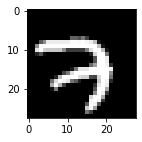

Class:  7


In [57]:
# Import MINST data
# The MNIST data is split into three parts: 55,000 data points of training data (mnist.train), 
# 10,000 points of test data (mnist.test), and 5,000 points of validation data (mnist.validation).

# Both the training set and test set contain images and their corresponding labels; for example the 
# training images are mnist.train.images and the training labels are mnist.train.labels.
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from matplotlib import pyplot as plt
import numpy as np
tf.logging.set_verbosity(tf.logging.ERROR)


%matplotlib inline

mnist = input_data.read_data_sets("data/", one_hot=True)

fig, ax = plt.subplots(figsize=(2, 2))
plt.imshow(mnist.train.images[0].reshape((28, 28)), interpolation='nearest', cmap='gray')
plt.show()

print("Class: ", np.argmax(mnist.train.labels[0]))

In [58]:
# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input    = 784 # MNIST data input (img shape: 28*28)
n_classes  = 10  # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [59]:
# Create model
def multilayer_perceptron(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [60]:
# Construct model
logits = multilayer_perceptron(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Initializing the variables
init = tf.global_variables_initializer()

In [61]:
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([train_op, loss_op], feed_dict={X: batch_x,
                                                            Y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))
    print("Optimization Finished!")

    # Test model
    pred = tf.nn.softmax(logits)  # Apply softmax to logits
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({X: mnist.test.images, Y: mnist.test.labels}))

InternalError: 2 root error(s) found.
  (0) Internal: Blas GEMM launch failed : a.shape=(100, 784), b.shape=(784, 256), m=100, n=256, k=784
	 [[node MatMul_2 (defined at <ipython-input-59-93068b2780b1>:4) ]]
	 [[Mean/_7]]
  (1) Internal: Blas GEMM launch failed : a.shape=(100, 784), b.shape=(784, 256), m=100, n=256, k=784
	 [[node MatMul_2 (defined at <ipython-input-59-93068b2780b1>:4) ]]
0 successful operations.
0 derived errors ignored.

Errors may have originated from an input operation.
Input Source operations connected to node MatMul_2:
 Variable/read (defined at <ipython-input-58-fdb27d74d090>:19)	
 Placeholder (defined at <ipython-input-58-fdb27d74d090>:14)

Input Source operations connected to node MatMul_2:
 Variable/read (defined at <ipython-input-58-fdb27d74d090>:19)	
 Placeholder (defined at <ipython-input-58-fdb27d74d090>:14)

Original stack trace for 'MatMul_2':
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\ipykernel\kernelapp.py", line 563, in start
    self.io_loop.start()
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\asyncio\base_events.py", line 534, in run_forever
    self._run_once()
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\asyncio\base_events.py", line 1771, in _run_once
    handle._run()
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\ipykernel\kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\ipykernel\kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\IPython\core\interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\IPython\core\interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\IPython\core\interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-60-db821fd707b3>", line 2, in <module>
    logits = multilayer_perceptron(X)
  File "<ipython-input-59-93068b2780b1>", line 4, in multilayer_perceptron
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tensorflow\python\util\dispatch.py", line 180, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tensorflow\python\ops\math_ops.py", line 2647, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 5925, in mat_mul
    name=name)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tensorflow\python\framework\ops.py", line 3616, in create_op
    op_def=op_def)
  File "C:\Users\Mateusz\Miniconda3\envs\tf-gpu-env\lib\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()
